# **Project Name**    - Amazon Prime TV shows and movies



##### **Project Type**    - EDA
##### **Contribution**    - Individual
  


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/saikatM333/Netflix_EDA.git


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?
Trends Over Time: How has Amazon Prime’s content library evolved?
IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#### **Define Your Business Objective?**

***GETTING  WHICH SHOWS/MOVIES, ACTORS,  TO BE PROMOTED TO INCRESE THE PLATFORM ENGAGEMENT***

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
credits_data =  pd.read_csv('credits.csv')
titles_data =  pd.read_csv('titles.csv')



### Dataset First View

In [3]:
# first we will look into to  titles data
titles_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
# secound we will se the credits data set
credits_data.head()


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Credits row column count" , credits_data.shape)
print("Titles row column count" , titles_data.shape)

Credits row column count (124235, 5)
Titles row column count (9871, 15)


### Dataset Information

In [6]:
# Dataset Info
# first we will see titles data set
titles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [7]:
# secound we will see credits dataset
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

#### Missing Values/Null Values

In [113]:
# copying the data
titles_cleaned_data =  titles_data.copy()
credits_cleaned_data =  credits_data.copy()


*checking number of null values in the imdb_score , tmdb_score , tmdb_popularity of credits data*

In [114]:

# Missing Values/Null Values Count
def null_missing_val(df):
    features_null =dict()
    try:
        cols =  df.columns 
        for col in cols :
            if df[col].isnull().sum() != 0:
                features_null[col] =  df[col].isnull().sum()
    except Exception as e :
        print( 'Error: ',e)    
    return features_null

In [115]:
titles_null =  null_missing_val(titles_cleaned_data)
titles_null

{'description': np.int64(119),
 'age_certification': np.int64(6487),
 'seasons': np.int64(8514),
 'imdb_id': np.int64(667),
 'imdb_score': np.int64(1021),
 'imdb_votes': np.int64(1031),
 'tmdb_popularity': np.int64(547),
 'tmdb_score': np.int64(2082)}

In [116]:
credits_null =  null_missing_val(credits_cleaned_data)
credits_null

{'character': np.int64(16287)}

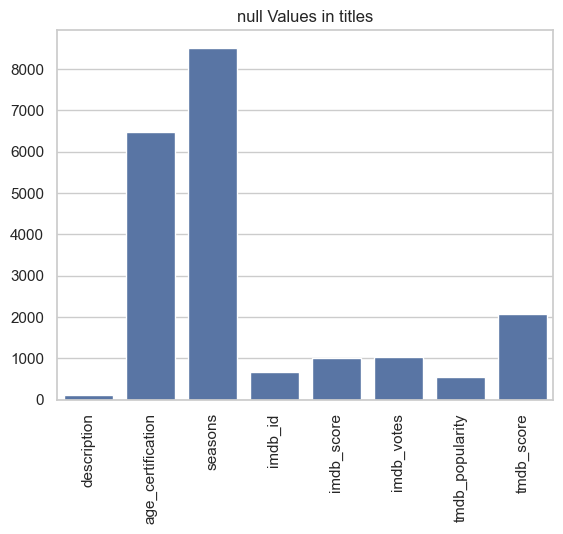

In [111]:
# Visualizing the missing values
sns.barplot(y = titles_null.values() , x =  titles_null.keys())
plt.xticks(rotation = 90)
plt.title('null Values in titles')
plt.show()


### What did you know about your dataset?

This dataset talk about the movies, shows and actors  worked on that content.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("list of columns in credits dataset")
credits_data.columns

list of columns in credits dataset


Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [12]:
print('list of columns in tites')
titles_data.columns

list of columns in tites


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [13]:
# Dataset Describe
# we will see some basic inshights about the titles data about numerical type

titles_data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [14]:
titles_data.describe(include =  'object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,9871,9871,9871,9752,3384,9871,9871,9204
unique,9868,9737,2,9734,11,2028,497,9201
top,tm137955,The Lost World,MOVIE,No overview found.,R,['drama'],['US'],tt0023849
freq,2,3,8514,5,1249,908,4810,2


In [15]:
credits_data.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


In [16]:
credits_data.describe( include =  'object')

,id,name,character,role
count,124235,124235,107948,124235
unique,8861,79758,71097,2
top,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,137,49,1540,115846


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.


## 3. ***Data Wrangling***

In [22]:
# Cleaning the titles data
# handaling null values of various columns


titles_cleaned_data['imdb_score']=titles_cleaned_data['imdb_score'].fillna(titles_cleaned_data['imdb_score'].median())
titles_cleaned_data['imdb_score'].isnull().sum()

np.int64(0)

In [23]:
titles_cleaned_data['tmdb_score']=titles_cleaned_data['tmdb_score'].fillna(titles_cleaned_data['tmdb_score'].median())
titles_cleaned_data['tmdb_score'].isnull().sum()

np.int64(0)

In [24]:
titles_cleaned_data['tmdb_popularity']=titles_cleaned_data['tmdb_popularity'].fillna(titles_cleaned_data['tmdb_popularity'].median())
titles_cleaned_data['tmdb_popularity'].isnull().sum()

np.int64(0)

In [25]:
def handle_outlier(df, columns):
    print("number of rows before outlier removal",df.shape)
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            print(f"Outliers removed from column '{col}'")
        else:
            print(f"Column '{col}' not found.")
    print("number of rows after outlier removal",df.shape)
    return df


In [26]:
titles_cleaned_data['tmdb_popularity_normalized'] = np.log(titles_cleaned_data['tmdb_popularity'])

In [27]:
col =  [ 'tmdb_popularity_normalized']
titles_cleaned_data_no_outlier =  handle_outlier( titles_cleaned_data , col)

number of rows before outlier removal (9871, 16)
Outliers removed from column 'tmdb_popularity_normalized'
number of rows after outlier removal (9679, 16)


In [28]:
# standardize the certification col

In [29]:
titles_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9871 non-null   object 
 1   title                       9871 non-null   object 
 2   type                        9871 non-null   object 
 3   description                 9752 non-null   object 
 4   release_year                9871 non-null   int64  
 5   age_certification           3384 non-null   object 
 6   runtime                     9871 non-null   int64  
 7   genres                      9871 non-null   object 
 8   production_countries        9871 non-null   object 
 9   seasons                     1357 non-null   float64
 10  imdb_id                     9204 non-null   object 
 11  imdb_score                  9871 non-null   float64
 12  imdb_votes                  8840 non-null   float64
 13  tmdb_popularity             9871 

In [30]:
import ast
titles_cleaned_data_no_outlier['genres'] = titles_cleaned_data_no_outlier['genres'].apply(ast.literal_eval)

# Step 2: Explode the list into multiple rows


titles_cleaned_data_no_outlier=  titles_cleaned_data_no_outlier.explode('genres').reset_index(drop = True)
titles_cleaned_data_no_outlier



C:\Users\Saikat Mondal\AppData\Local\Temp\ipykernel_55384\1764972117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned_data_no_outlier['genres'] = titles_cleaned_data_no_outlier['genres'].apply(ast.literal_eval)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_popularity_normalized
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21646,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,comedy,['US'],NaN,tt15041600,6.1,NaN,0.600,6.0,-0.510826
21647,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,crime,['IN'],NaN,NaN,6.1,NaN,1.960,6.0,0.672944
21648,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,family,[],NaN,tt14331982,8.4,49.0,0.645,6.0,-0.438505
21649,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,drama,[],NaN,tt14331982,8.4,49.0,0.645,6.0,-0.438505


In [31]:

# cleaning the production

titles_cleaned_data_no_outlier['production_countries'] =  titles_cleaned_data_no_outlier['production_countries'].apply(ast.literal_eval)
titles_cleaned_data_no_outlier =  titles_cleaned_data_no_outlier.explode('production_countries').reset_index(drop =  True)


In [32]:
titles_df =  titles_cleaned_data_no_outlier


### Data Wrangling Code

In [33]:
# Write your code to make your dataset analysis ready.

In [34]:
# getting number of shows and movies

number_shows_movies =  titles_cleaned_data_no_outlier.drop_duplicates(subset='id').value_counts( 'type').reset_index()
number_shows_movies

,type,count
0,MOVIE,8398
1,SHOW,1278


In [35]:
# popularity of show vs movies

popularity_show_movies =  titles_cleaned_data_no_outlier.groupby('type')['tmdb_popularity_normalized'].mean()
popularity_show_movies

type
MOVIE    1.163643
SHOW     1.688528
Name: tmdb_popularity_normalized, dtype: float64

In [36]:

consistent_content_upload =  titles_df.drop_duplicates(subset='id').value_counts('production_countries').reset_index().sort_values(by = 'count' , ascending= False).head(10)
consistent_content_upload

,production_countries,count
0,US,4880
1,IN,1058
2,GB,763
3,CA,421
4,JP,171
5,FR,163
6,AU,157
7,CN,127
8,XX,120
9,DE,103


In [37]:
# # top 10  popular_movie countries production
top_popular_countries_sorted = titles_df.drop_duplicates(subset=['id']).groupby('production_countries').agg(

    tmdb_popularity_min = ('tmdb_popularity' , 'min'),
    tmdb_popularity_max = ('tmdb_popularity' , 'max'),
    tmdb_popularity_mean = ('tmdb_popularity' , 'mean')
).reset_index().sort_values(by  =  'tmdb_popularity_mean' , ascending = False).head(20)

top_popular_countries_sorted


,production_countries,tmdb_popularity_min,tmdb_popularity_max,tmdb_popularity_mean
45,KE,3.090,41.634,22.362000
33,HU,3.340,23.324,14.803500
85,TN,12.879,12.879,12.879000
42,JM,0.600,21.273,10.936500
52,LV,10.927,10.927,10.927000
44,JP,0.600,42.197,10.434980
16,CN,0.600,40.681,9.643685
32,HR,9.546,9.546,9.546000
10,BO,9.537,9.537,9.537000
70,PY,9.461,9.461,9.461000


In [38]:
#  contries with contries by IMdb score greter than 8
top_Countries_by_imdb_score = titles_df.drop_duplicates(subset= 'id').groupby('production_countries')['imdb_score'].mean().reset_index().sort_values( by= 'imdb_score' , ascending =  False)
top_Countries_by_imdb_score[top_Countries_by_imdb_score['imdb_score']>  8]

,production_countries,imdb_score
19,CU,8.6


In [39]:
def get_most_popular_genres_by_country(df, country_code):
    try:
        # Validate input DataFrame
        county_wise__most_popluar_ganre =  df.groupby(['genres' , 'production_countries'])['tmdb_popularity_normalized'].mean().reset_index()
        return county_wise__most_popluar_ganre.loc[ county_wise__most_popluar_ganre['production_countries'] == country_code ].sort_values(by = 'tmdb_popularity_normalized' , ascending =  False)


    except Exception as e:
        print(f" error: {e}")
        return None


In [40]:
get_most_popular_genres_by_country(titles_df , 'US')

,genres,production_countries,tmdb_popularity_normalized
469,european,US,1.970272
581,fantasy,US,1.707379
845,scifi,US,1.658289
108,animation,US,1.551630
950,thriller,US,1.465236
682,horror,US,1.405593
631,history,US,1.294955
523,family,US,1.290784
236,crime,US,1.224487
395,drama,US,1.167151


In [41]:
get_most_popular_genres_by_country(titles_df , 'IN')

,genres,production_countries,tmdb_popularity_normalized
978,war,IN,1.706166
438,european,IN,1.373943
607,history,IN,1.218693
92,animation,IN,1.096424
1018,western,IN,1.092930
864,sport,IN,1.031525
727,reality,IN,0.954890
210,crime,IN,0.898473
553,fantasy,IN,0.879204
823,scifi,IN,0.848429


In [42]:
#
titles_df['decade'] =  titles_df['release_year']//10
trend_df = titles_df.drop_duplicates(subset='id').groupby(['decade', 'genres'])['tmdb_popularity'].mean().reset_index()
trend_df

,decade,genres,tmdb_popularity
0,191,action,1.849000
1,191,comedy,0.709000
2,191,drama,1.641000
3,191,fantasy,1.597667
4,191,history,9.412000
...,...,...,...
175,202,scifi,7.309167
176,202,sport,5.137000
177,202,thriller,4.746968
178,202,war,4.817000


In [43]:
# how popularity of shows and movies are working out to decades
trend_shows_movies_popularity =  titles_df.groupby(['type' , 'decade'])['tmdb_popularity'].mean().reset_index()
trend_shows_movies_popularity

,type,decade,tmdb_popularity
0,MOVIE,191,2.291895
1,MOVIE,192,2.972013
2,MOVIE,193,1.812953
3,MOVIE,194,2.222431
4,MOVIE,195,3.330750
5,MOVIE,196,3.949804
6,MOVIE,197,4.720417
7,MOVIE,198,5.227352
8,MOVIE,199,6.003961
9,MOVIE,200,6.437957


In [44]:

# MERGE THE TITLES AND CREDITS TO
credits_titles_data  =  pd.merge(credits_data , titles_df , on = 'id' , how = 'inner')


In [45]:
credits_titles_data.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'tmdb_popularity_normalized', 'decade'],
      dtype='object')

In [46]:
credits_titles_data.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,...,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_popularity_normalized,decade
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,...,comedy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925,193
1,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,...,family,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925,193
2,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,...,animation,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925,193
3,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,...,action,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925,193
4,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,...,fantasy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,2.735925,193


In [47]:
# unique person id
print(credits_titles_data['id'].nunique())
print(credits_titles_data['person_id'].nunique())

8671
78081


In [48]:
# top performing actors in each genre
def get_most_popular_actor(df , genre):
  df =  df.loc[(df['genres']==genre) &(df['role'] =='ACTOR')]
  return df.groupby(['genres','person_id'])['tmdb_popularity'].mean().reset_index().sort_values(by ='tmdb_popularity', ascending =  False)


In [49]:
TT= get_most_popular_actor(credits_titles_data , 'action')
TT

,genres,person_id,tmdb_popularity
15765,action,719016,43.031
13481,action,446800,43.031
381,action,2946,43.031
486,action,3780,43.031
13646,action,468278,43.031
...,...,...,...
19681,action,2212734,0.600
19682,action,2212737,0.600
19683,action,2212751,0.600
8741,action,121771,0.600


In [50]:
# number of content over decade
# content_over_decade = credits_titles_data.groupby('decade')['id'].nunique().reset_index()
# content_over_decade.rename({'id':'number_of_content'} , inplace =  True , axis =  1)
# content_over_decade

In [51]:
def get_most_popular_production(df , genre):
  df =  df.loc[(df['genres']==genre)]
  return df.groupby('production_countries')['imdb_score'].mean().reset_index().sort_values(by ='imdb_score', ascending =  False).head(10)


In [52]:
get_most_popular_production(titles_df, 'action')

,production_countries,imdb_score
6,BA,7.900000
62,SI,7.900000
22,FJ,7.800000
50,PF,7.800000
25,GR,7.700000
67,TT,7.400000
45,MY,7.100000
60,SE,7.100000
52,PK,7.000000
8,BE,6.857143


In [53]:
# number of content  in each decade
decade_count =  titles_df.drop_duplicates('id').value_counts('decade').reset_index()
decade_count.rename({'count':'number_of_content_upload'},inplace =  True , axis =  1)
decade_count

,decade,number_of_content_upload
0,201,4246
1,202,1574
2,200,1156
3,199,534
4,194,420
5,193,414
6,198,402
7,197,353
8,195,253
9,196,239


In [54]:
# function for perticular actor/director popularity over decade
# i will give actor it will give poppularity across the decade

credits_titles_data.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'tmdb_popularity_normalized', 'decade'],
      dtype='object')

In [55]:
# Step 1: Top 10% IMDb score movies
top_movies = titles_df.drop_duplicates('id').sort_values(by='imdb_score', ascending=False)
top_movies = top_movies[top_movies['imdb_score'] >= top_movies['imdb_score'].quantile(0.90)]

top_movies


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_popularity_normalized,decade
23719,tm1159926,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,action,IN,NaN,tt14448632,9.9,2036.0,3.812,8.5,1.338154,202
21056,ts231725,Water Helps the Blood Run,SHOW,"Five orphan girls from diverse backgrounds, ca...",2019,NaN,29,drama,NaN,1.0,tt11524214,9.7,30.0,2.536,6.0,0.930588,201
23668,ts304299,Couple of Mirrors,SHOW,"You Yi is a young, innocent, and kind-hearted ...",2021,NaN,46,drama,CN,1.0,tt15509598,9.5,99.0,5.116,8.0,1.632373,202
19982,ts86600,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-G,47,drama,US,2.0,tt9471404,9.4,25538.0,30.771,9.4,3.426573,201
24285,tm1167998,Tari Sathe,MOVIE,The story revolves between two youngsters who ...,2021,NaN,119,drama,IN,NaN,tt13181612,9.4,517.0,0.821,7.0,-0.197232,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,tm17300,Galatta Kalyanam,MOVIE,"In order to marry Lalitha, Madhan sets out to ...",1968,NaN,148,comedy,IN,NaN,tt0290622,7.5,84.0,1.511,5.0,0.412772,196
216,tm131025,Mother,MOVIE,A story about a family torn apart by a worker...,1926,NaN,89,drama,SU,NaN,tt0017128,7.5,2785.0,4.756,7.3,1.559407,192
11576,tm45629,Disconnect,MOVIE,Disconnect interweaves multiple storylines abo...,2012,R,111,thriller,US,NaN,tt1433811,7.5,75261.0,10.315,7.1,2.333599,201
9056,ts16544,Dino Dan,SHOW,Join paleontologist-in-training Dan Henderson ...,2009,TV-Y7,25,family,CA,4.0,tt1447487,7.5,96.0,9.235,5.0,2.223001,200


In [56]:
# unique age certification
list_of_certi = titles_df['age_certification'].dropna().unique().tolist()
print(list_of_certi)

['TV-PG', 'PG', 'G', 'PG-13', 'R', 'TV-G', 'TV-Y', 'NC-17', 'TV-Y7', 'TV-MA', 'TV-14']


In [57]:
#unique list of genre
list_of_genre =  titles_df['genres'].dropna().unique().tolist()
print(list_of_genre)

['comedy', 'family', 'animation', 'action', 'fantasy', 'horror', 'drama', 'war', 'western', 'european', 'romance', 'thriller', 'crime', 'history', 'sport', 'scifi', 'documentation', 'music', 'reality']


In [58]:
#unique list of production
list_of_production =  titles_df['production_countries'].dropna().unique().tolist()
print(list_of_production)

['US', 'GB', 'MX', 'CA', 'DE', 'SU', 'IN', 'XX', 'IT', 'FR', 'HK', 'ES', 'IL', 'JP', 'AU', 'CH', 'IE', 'GR', 'CN', 'PH', 'NL', 'YU', 'CI', 'PR', 'LI', 'KR', 'XC', 'HU', 'TW', 'AN', 'MC', 'CO', 'RO', 'EG', 'TR', 'BE', 'ZA', 'PT', 'CL', 'SE', 'BR', 'DK', 'NZ', 'RU', 'LU', 'CZ', 'FI', 'AT', 'SK', 'AR', 'VE', 'TH', 'PL', 'AE', 'SI', 'BA', 'ID', 'NO', 'AF', 'IR', 'IS', 'BG', 'JM', 'RS', 'SZ', 'LT', 'TC', 'SG', 'UY', 'BO', 'UA', 'MY', 'TN', 'QA', 'NG', 'KZ', 'GQ', 'MT', 'SO', 'KE', 'United States of America', 'MA', 'VN', 'BD', 'FJ', 'MN', 'UG', 'TT', 'PK', 'XK', 'PE', 'DO', 'SV', 'GE', 'PS', 'HR', 'LV', 'AQ', 'LB', 'KH', 'CR', 'BM', 'JO', 'PA', 'AL', 'CY', 'CU', 'PY', 'EE', 'ET', 'PF', 'EC', 'IO', 'AM', 'SY', 'CM', 'LY']


In [59]:
titles_df['duration_category'] = pd.cut(titles_df['runtime'], bins=[0, 30, 90, 180, 500], labels=["Short", "Medium", "Long", "Epic"])
duration_trend = titles_df.groupby('duration_category').agg(
    tmdb_popularity_mean = ('tmdb_popularity' , 'mean'),
    imdb_score_mean =('imdb_score','mean'),
    tmdb_score_mean =('tmdb_score','mean')
).reset_index()
duration_trend


C:\Users\Saikat Mondal\AppData\Local\Temp\ipykernel_55384\1230279095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_trend = titles_df.groupby('duration_category').agg(


,duration_category,tmdb_popularity_mean,imdb_score_mean,tmdb_score_mean
0,Short,9.257588,6.863460,7.029075
1,Medium,4.548855,5.777752,5.797501
2,Long,6.357590,6.035546,6.032404
3,Epic,8.049848,6.907143,6.767857


In [60]:
#effect on popularity of certification
titles_df.groupby('age_certification')['tmdb_popularity'].mean().sort_values(ascending=False)


age_certification
TV-MA    16.018730
TV-Y7    14.832269
TV-PG    11.282791
TV-14    11.266224
TV-Y      9.532941
R         9.060814
TV-G      8.287984
PG-13     8.069900
PG        6.947482
NC-17     6.651000
G         4.631547
Name: tmdb_popularity, dtype: float64

In [61]:
# combinations of directors and actors doing great



In [62]:
def get_top_directors(df):
    return df[df['role'] == 'DIRECTOR'].groupby('person_id')['tmdb_popularity'].mean().reset_index().sort_values(by='tmdb_popularity', ascending=False).head(10)


In [63]:
get_top_directors(credits_titles_data)

,person_id,tmdb_popularity
346,18073,42.994
4988,829641,42.571
951,46504,42.264
123,6927,42.208
4352,457780,41.978
385,19813,41.634
372,19321,41.456
75,4685,41.275
619,30024,40.709
1185,56726,40.681


In [64]:
def consistent_performer(df  , role ):
  popularity = df.loc[df['role'] ==role,['id','person_id','name' , 'tmdb_popularity']  ].groupby('person_id').agg(
   mean_popularity =  ('tmdb_popularity' , 'mean') ,
   count = ('id' , 'count')
  ).query('count>5').sort_values(by =  'mean_popularity' , ascending  =  False).reset_index()
  return popularity

In [65]:
consitent_actors = consistent_performer(credits_titles_data , 'ACTOR')
consitent_actors

,person_id,mean_popularity,count
0,34923,41.456,8
1,19316,41.456,8
2,19315,41.456,8
3,19312,41.456,8
4,3544,41.456,8
...,...,...,...
18476,106747,0.600,6
18477,280032,0.600,6
18478,1054095,0.600,6
18479,330720,0.600,6


In [66]:
consitent_director = consistent_performer(credits_titles_data , 'DIRECTOR')
consitent_director

,person_id,mean_popularity,count
0,19321,41.456,8
1,4685,41.275,6
2,34157,40.382,6
3,804120,40.382,6
4,79210,38.966,10
...,...,...,...
954,9216,0.600,8
955,349758,0.600,6
956,280032,0.600,6
957,50185,0.600,6


In [67]:
# identify the shows/movies which are not popular but have high imdb_score -> comparing the number of votes by popularity
imdb_score_threshold =  titles_df['imdb_score'].quantile(0.85)
popularity_threshold =  titles_df['tmdb_popularity_normalized'].quantile(0.25)

high_imdb_score_low_popularity = titles_df[(titles_df['imdb_score']>= imdb_score_threshold)& (titles_df['tmdb_popularity_normalized'] <= popularity_threshold)].drop_duplicates('id')

high_imdb_score_low_popularity

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_popularity_normalized,decade,duration_category
760,tm320369,Fighting Mustang,MOVIE,Filmed back-to-back with three other Sunset Ca...,1948,NaN,56,western,US,NaN,tt0040356,7.5,63.0,0.600,6.0,-0.510826,194,Medium
1409,tm411555,Silks and Saddles,MOVIE,Jockey Johnny Spencer loses his job with Mrs. ...,1929,NaN,58,drama,US,NaN,tt0020406,8.2,10.0,0.600,6.0,-0.510826,192,Medium
3213,ts17223,Free to Choose,SHOW,Free to Choose is a ten-part television series...,1980,NaN,57,documentation,US,2.0,tt0852785,9.2,279.0,1.400,7.8,0.336472,198,Medium
3352,tm116331,Where the Lilies Bloom,MOVIE,A family of children decide not to tell anyone...,1974,G,98,drama,US,NaN,tt0072401,7.3,799.0,1.080,6.3,0.076961,197,Long
3621,tm189047,Distant Thunder,MOVIE,"Gangacharan is the new Brahmin of a village, w...",1973,NaN,101,drama,IN,NaN,tt0069737,8.0,1505.0,1.122,6.3,0.115113,197,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,tm1072178,The Green Force Mission 14th March,MOVIE,Ex-army chief created a secret Force to save t...,2021,NaN,106,action,NaN,NaN,tt14873790,7.8,57.0,0.600,6.0,-0.510826,202,Long
24962,tm1074422,27 September,MOVIE,"The story is about life, love, and nirvana. S...",2021,PG-13,81,drama,NaN,NaN,tt14949724,7.7,58.0,0.989,5.5,-0.011061,202,Medium
25007,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,2021,NaN,74,NaN,NaN,NaN,tt15194208,7.4,231.0,0.600,6.0,-0.510826,202,Medium
25009,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,NaN,122,drama,NaN,NaN,tt14039792,8.4,1188.0,0.945,6.0,-0.056570,202,Long


In [68]:
# identify the shows/movies which are popular but have low imdb_score -> comparing the number of votes by popularity
imdb_score_threshold =  titles_df['imdb_score'].quantile(0.25)
popularity_threshold =  titles_df['tmdb_popularity_normalized'].quantile(0.80)

low_imdb_score_high_popularity = titles_df[(titles_df['imdb_score']<= imdb_score_threshold)& (titles_df['tmdb_popularity_normalized'] >= popularity_threshold)].drop_duplicates('id')

low_imdb_score_high_popularity

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_popularity_normalized,decade,duration_category
2944,tm188698,Lost Horizon,MOVIE,"While escaping war-torn China, a group of Euro...",1973,G,150,fantasy,US,NaN,tt0070337,5.2,2581.0,9.010,5.4,2.198335,197,Long
4965,tm58978,Staying Alive,MOVIE,It's five years later and Tony Manero's Saturd...,1983,PG,93,drama,US,NaN,tt0086361,4.7,15865.0,16.412,5.7,2.798013,198,Long
5031,tm154232,Graveyard Shift,MOVIE,John Hall is a drifter who wanders into a smal...,1990,R,89,horror,JP,NaN,tt0099697,4.9,11179.0,14.215,5.2,2.654298,199,Medium
5105,tm128021,Transylvania 6-5000,MOVIE,Two reporters travel to a strange castle in Tr...,1985,PG,93,comedy,US,NaN,tt0090196,4.9,7581.0,9.828,5.5,2.285235,198,Long
5157,tm63083,Porky's II: The Next Day,MOVIE,When the students of Angel Beach High decide t...,1983,R,98,comedy,CA,NaN,tt0086129,5.0,11948.0,11.630,5.7,2.453588,198,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,tm1005301,Je te veux moi non plus,MOVIE,"Nina and Dylan, best friends since childhood, ...",2021,NaN,100,romance,FR,NaN,tt14121686,3.8,284.0,37.919,5.7,3.635452,202,Long
23991,tm819794,There's Something About Mario,MOVIE,Mario decides to tell his family the truth abo...,2021,NaN,111,comedy,BR,NaN,tt10573946,5.3,388.0,39.881,5.8,3.685900,202,Long
24013,tm991286,The Lift,MOVIE,"On their fifth wedding anniversary, Sitio and ...",2021,NaN,70,scifi,MX,NaN,tt7685962,4.7,522.0,21.139,6.0,3.051120,202,Medium
24251,tm1114499,Detetive Madeinusa,MOVIE,A bumbling new detective is hired by a billion...,2021,NaN,101,comedy,BR,NaN,tt14028680,3.7,56.0,20.255,4.6,3.008402,202,Long


In [69]:
# genre wise leader of the production


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -1  histogram plot for imdb_score , tmdb_score , popularity

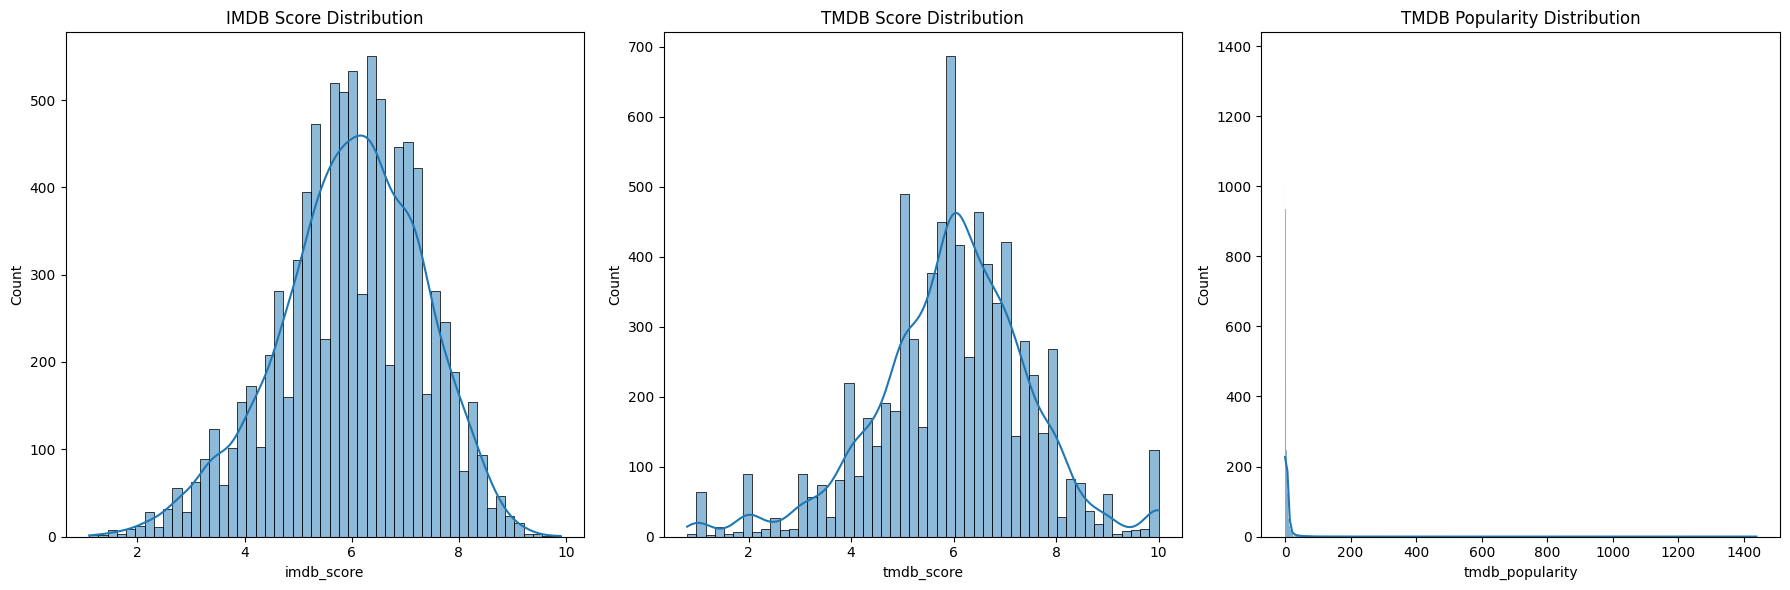

In [70]:
# Chart - 1 visualization code
fig , axs =  plt.subplots(1,3 , figsize =  (18,6))
features =  ['imdb_score' , 'tmdb_score' , 'tmdb_popularity']
heading =  ['IMDB Score Distribution' , 'TMDB Score Distribution' , 'TMDB Popularity Distribution']
for i in range(len(features)):
  sns.histplot(x= features[i] , data  =  titles_data , kde =  True , ax=  axs[i])
  plt.xlabel(features[i])
  axs[i].set_title(heading[i])
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To understand the distribution of the variables and skewness in thier distribution.

##### 2. What is/are the insight(s) found from the chart?

imdb_score andn tmdb_score is left skewed and tmdb_popularity is highly right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this will help to clean the data and fill the null value by helping use to choose between median and mode.

#### Chart - 2 box plot for imdb_score , tmdb_score , tmdb_popularity

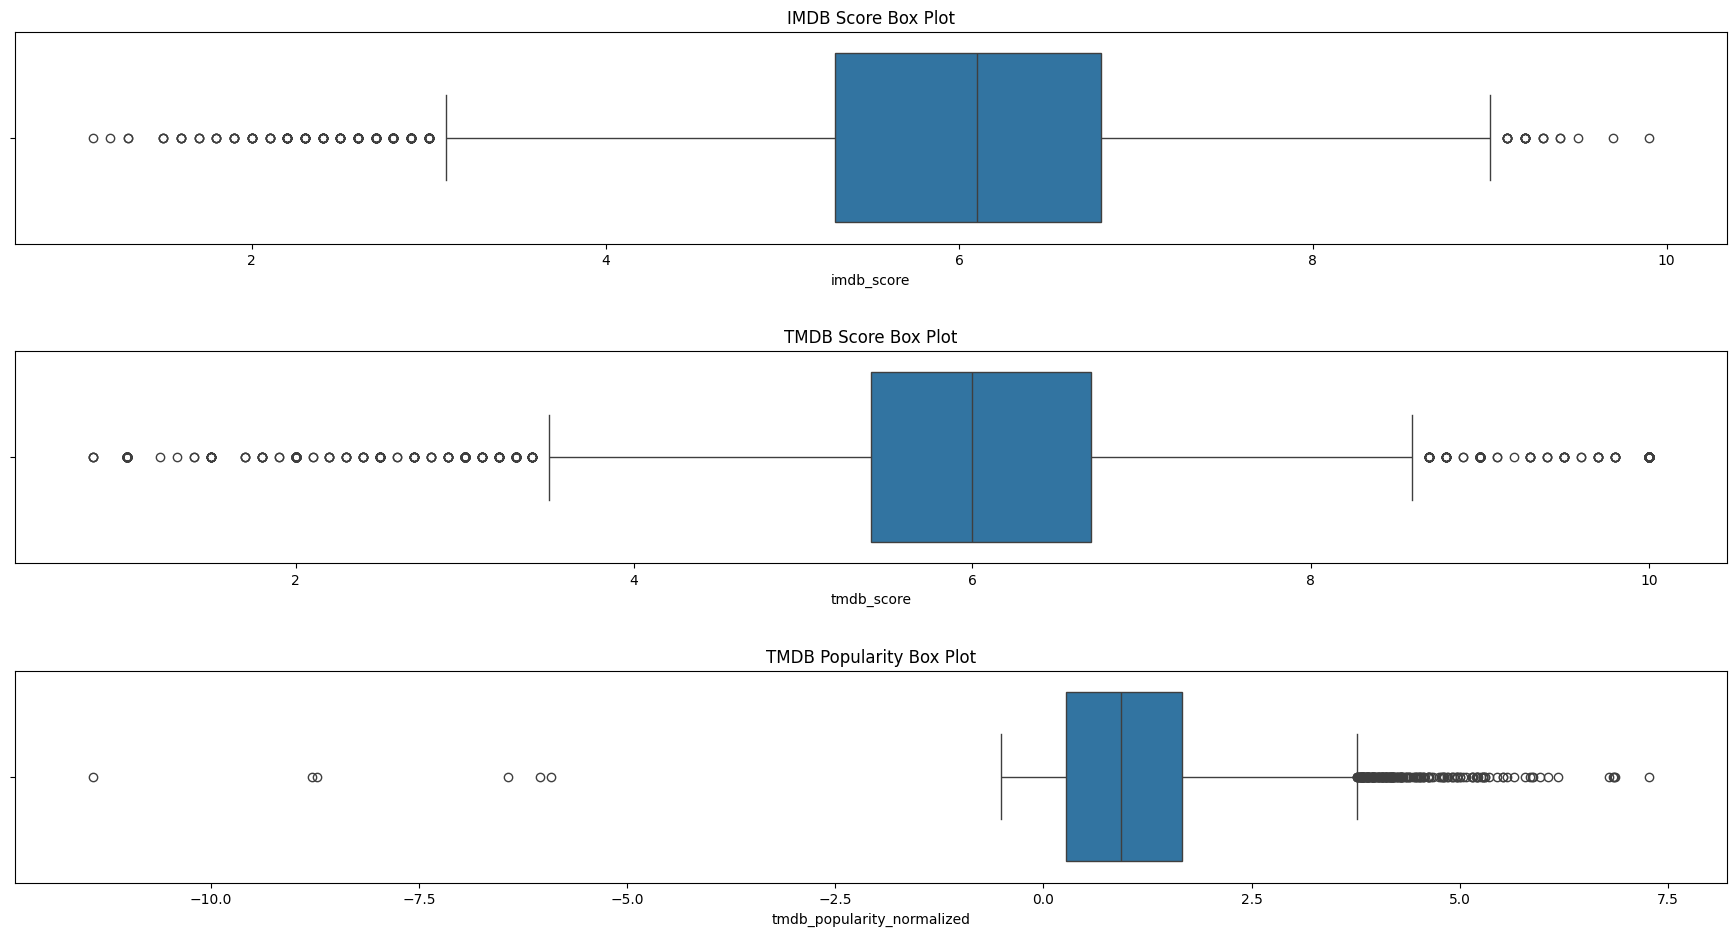

In [71]:
# Chart - 2 visualization code

fig , axs =  plt.subplots(3,1 , figsize =  (18,10))
features =  ['imdb_score' , 'tmdb_score' , 'tmdb_popularity_normalized']
heading =  ['IMDB Score Box Plot' , 'TMDB Score Box Plot' , 'TMDB Popularity Box Plot']

for i in range(len(features)):
  sns.boxplot(x  =  features[i] , data  =  titles_cleaned_data , ax= axs[i])
  plt.xlabel(features[i])
  axs[i].set_title(heading[i])
  plt.tight_layout(pad=3.0)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are the most efficient way to  detct oulier understand the value distribution.

##### 2. What is/are the insight(s) found from the chart?

Yes so for imdb_score and tmdb score tho there extream value exists but we cant label them as ouulier as they both are  in the valid range of 1 to  10 .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

no there no such indication of the neagtive growth it just tell imdb_score and tmdb_score are  in the correct range and we need to  handle the popularity  by bring it to  certain range by normalizing and remove them.

#### Chart - 3 pair plot

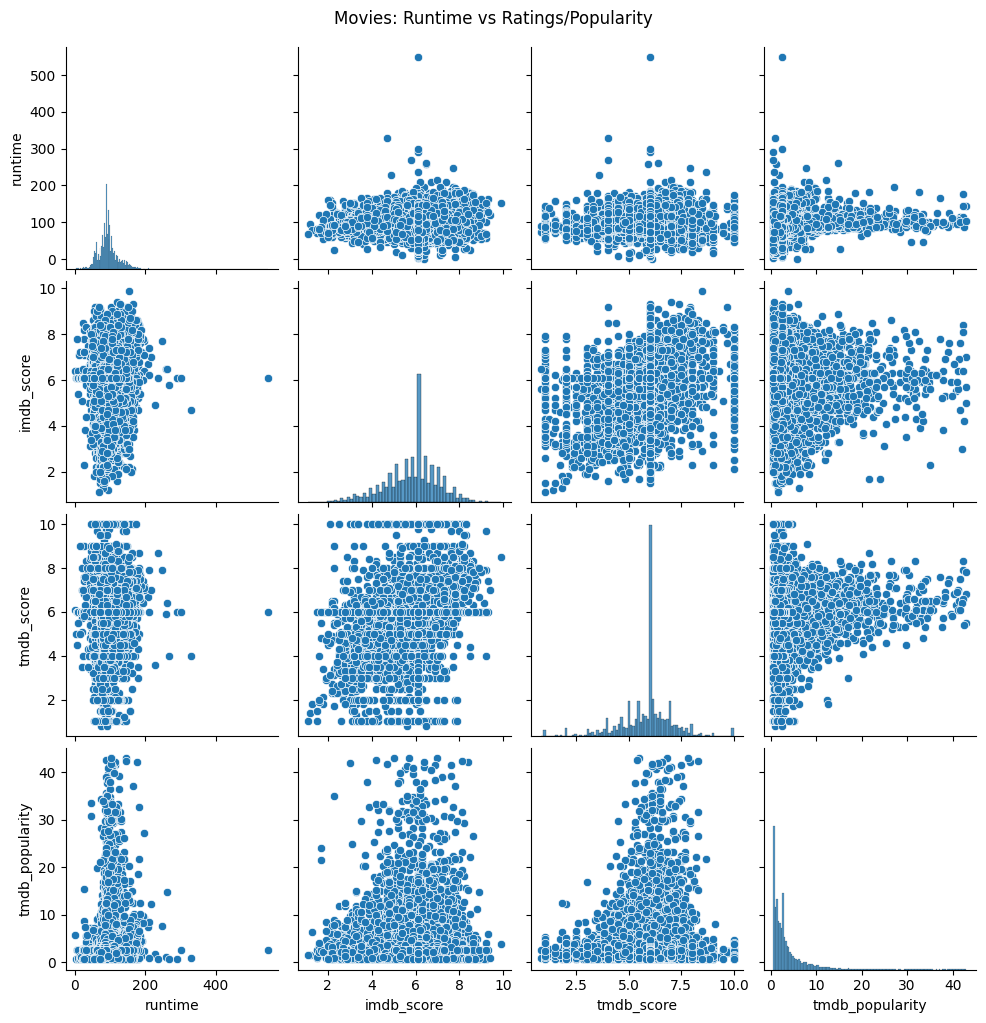

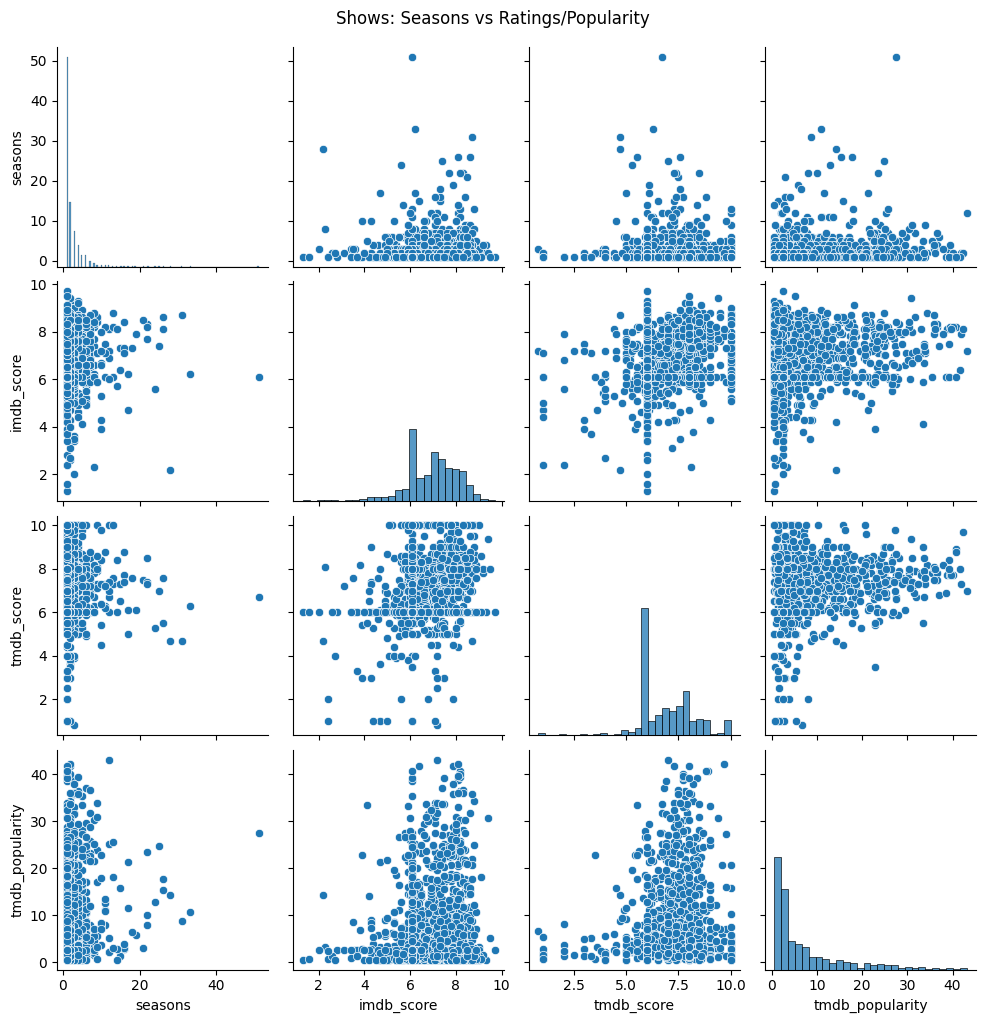

In [72]:
# Chart - 3 visualization code
movies = titles_cleaned_data_no_outlier[titles_cleaned_data_no_outlier['type'] == 'MOVIE'].drop_duplicates(subset='id')
shows = titles_cleaned_data_no_outlier[titles_cleaned_data_no_outlier['type'] == 'SHOW'].drop_duplicates(subset='id')
sns.pairplot(movies[['runtime', 'imdb_score', 'tmdb_score', 'tmdb_popularity']])
plt.suptitle("Movies: Runtime vs Ratings/Popularity", y=1.02)
plt.show()

shows[['seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity']].corr()
sns.pairplot(shows[['seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity']])
plt.suptitle("Shows: Seasons vs Ratings/Popularity", y=1.02)
plt.show()
 # use bar insted this





##### 1. Why did you pick the specific chart?

It tells the the realtionship between the multiple variable and show the clients very effectivily.

##### 2. What is/are the insight(s) found from the chart?

imdb_score in genral reduced after the runtime of 175 before it it was showing many movies with the high score.

there are many high popularity movies whifh are in between 75 - 175 runntime.

below 75 runtime again the the popularity is reducing.

all the movies with above 8 tmdb_sore is in between 75 185.

seasons with 1 - 7 there are many ssows which have high imdb_score.

shows with more than 20 seasons has significcatnt drop in popularty , imdb score and tmdb score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , if runtime goes above 175 popularity , imdb_scoreand and tmdb-score redice significantly.

and if seasons is more than 20 there is a drop in popularity , imdb_score , tmdb_score.

#### Chart - 4 correlation

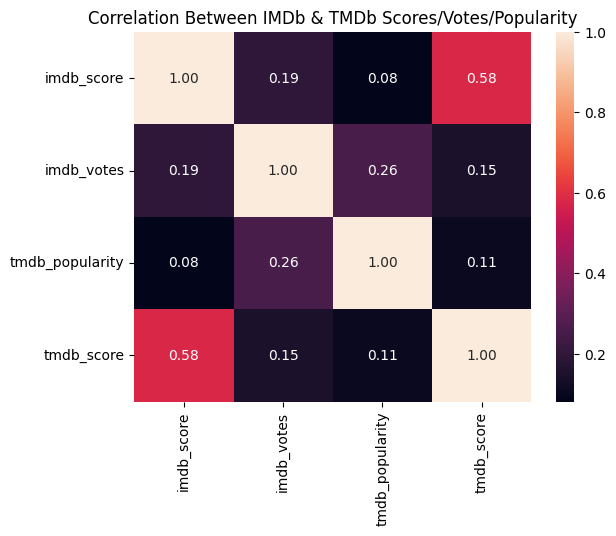

In [73]:
# Chart - 4 visualization code
titles_data_for_relation  =  titles_data.drop_duplicates(subset='id').dropna(subset= ['imdb_score' , 'imdb_votes' , 'tmdb_popularity','tmdb_score'])
titles_data_for_relation[['imdb_score' , 'imdb_votes' , 'tmdb_popularity','tmdb_score' ]].corr()
sns.heatmap(titles_data_for_relation[['imdb_score' , 'imdb_votes' , 'tmdb_popularity','tmdb_score' ]].corr() , annot = True , fmt = '.2f' )

plt.title('Correlation Between IMDb & TMDb Scores/Votes/Popularity')
plt.xticks(rotation =  90)
plt.show()

##### 1. Why did you pick the specific chart?

to show how the imdb_score , tmdb_popularity , tmdb_score , imdb_votes , to understant how each of these variable are realted to each other.

##### 2. What is/are the insight(s) found from the chart?

there is no significant relationship among the  variables but imdb_score and tmdb-score has medium level relationships.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For for individual platform we need to  to  independent analysis for tmdb and imdb.

#### Chart - 5 genre vs tmdb_popularity barplot

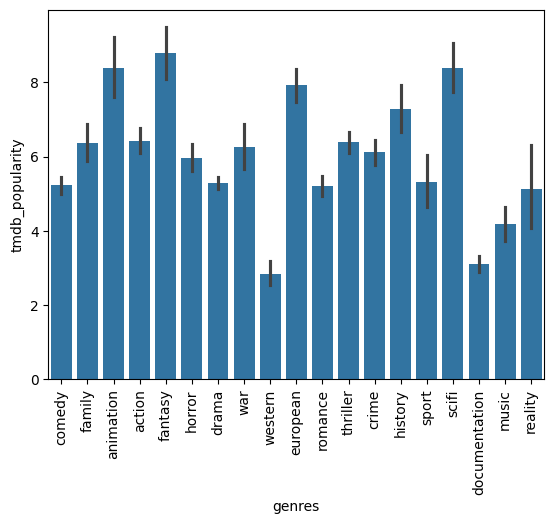

In [74]:
# Chart - 5 visualization code
sns.barplot(x  =  'genres' ,  y =  'tmdb_popularity' , data  =  titles_df)
plt.xticks(rotation =90)
plt.show()

##### 1. Why did you pick the specific chart?

bar chart best for categorical values and bivariate analysis and represnt the data very clearly with clear meassage.

##### 2. What is/are the insight(s) found from the chart?

animation ,sci-fi ,  fantacy , and european are some of the most popular genres.

documantation and wester and least popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes investing  more in the less popular movie in  marketing will be a loss to the comapny.

#### Chart - 6 pie_chart movies and shows

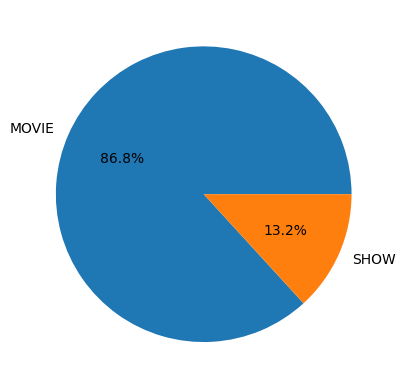

In [75]:
# Chart - 6 visualization code

plt.pie(x= number_shows_movies['count'] , labels = number_shows_movies['type'] , autopct = '%1.1f%%' )
plt.show()

##### 1. Why did you pick the specific chart?

pie chart effictilly shows the frequency of the classes

##### 2. What is/are the insight(s) found from the chart?

production of shows are comperatively too less than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , some times few shows get a high popularty gain and shows are highly enagaging hence less number of shos can keep the platform deprived of high engagement.

#### Chart - 7 genre vs popularity

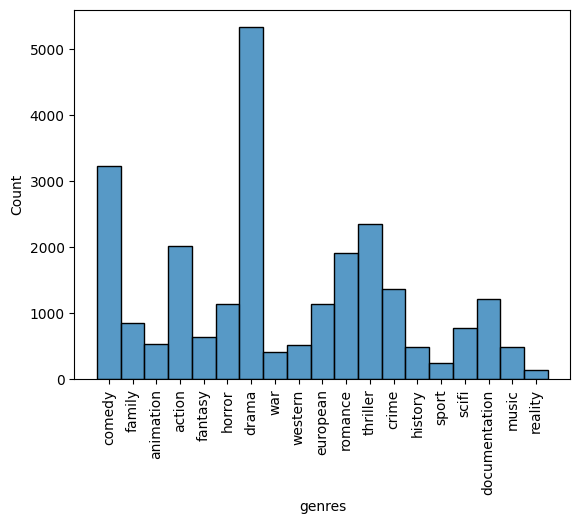

In [76]:
# Chart - 7 visualization code

# genre vs popularity
sns.histplot(x  =  'genres' , data  =  titles_df)
plt.xticks(rotation =90)
plt.show()

##### 1. Why did you pick the specific chart?

hist plot are good to visually see the count of unique values within a single variable

##### 2. What is/are the insight(s) found from the chart?

there is high imbalnce in certain type of genres production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , people can like some of the genres which are not produced.

#### Chart - 8 trend of the decade

C:\Users\Saikat Mondal\AppData\Local\Temp\ipykernel_55384\1348694909.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Saikat Mondal\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


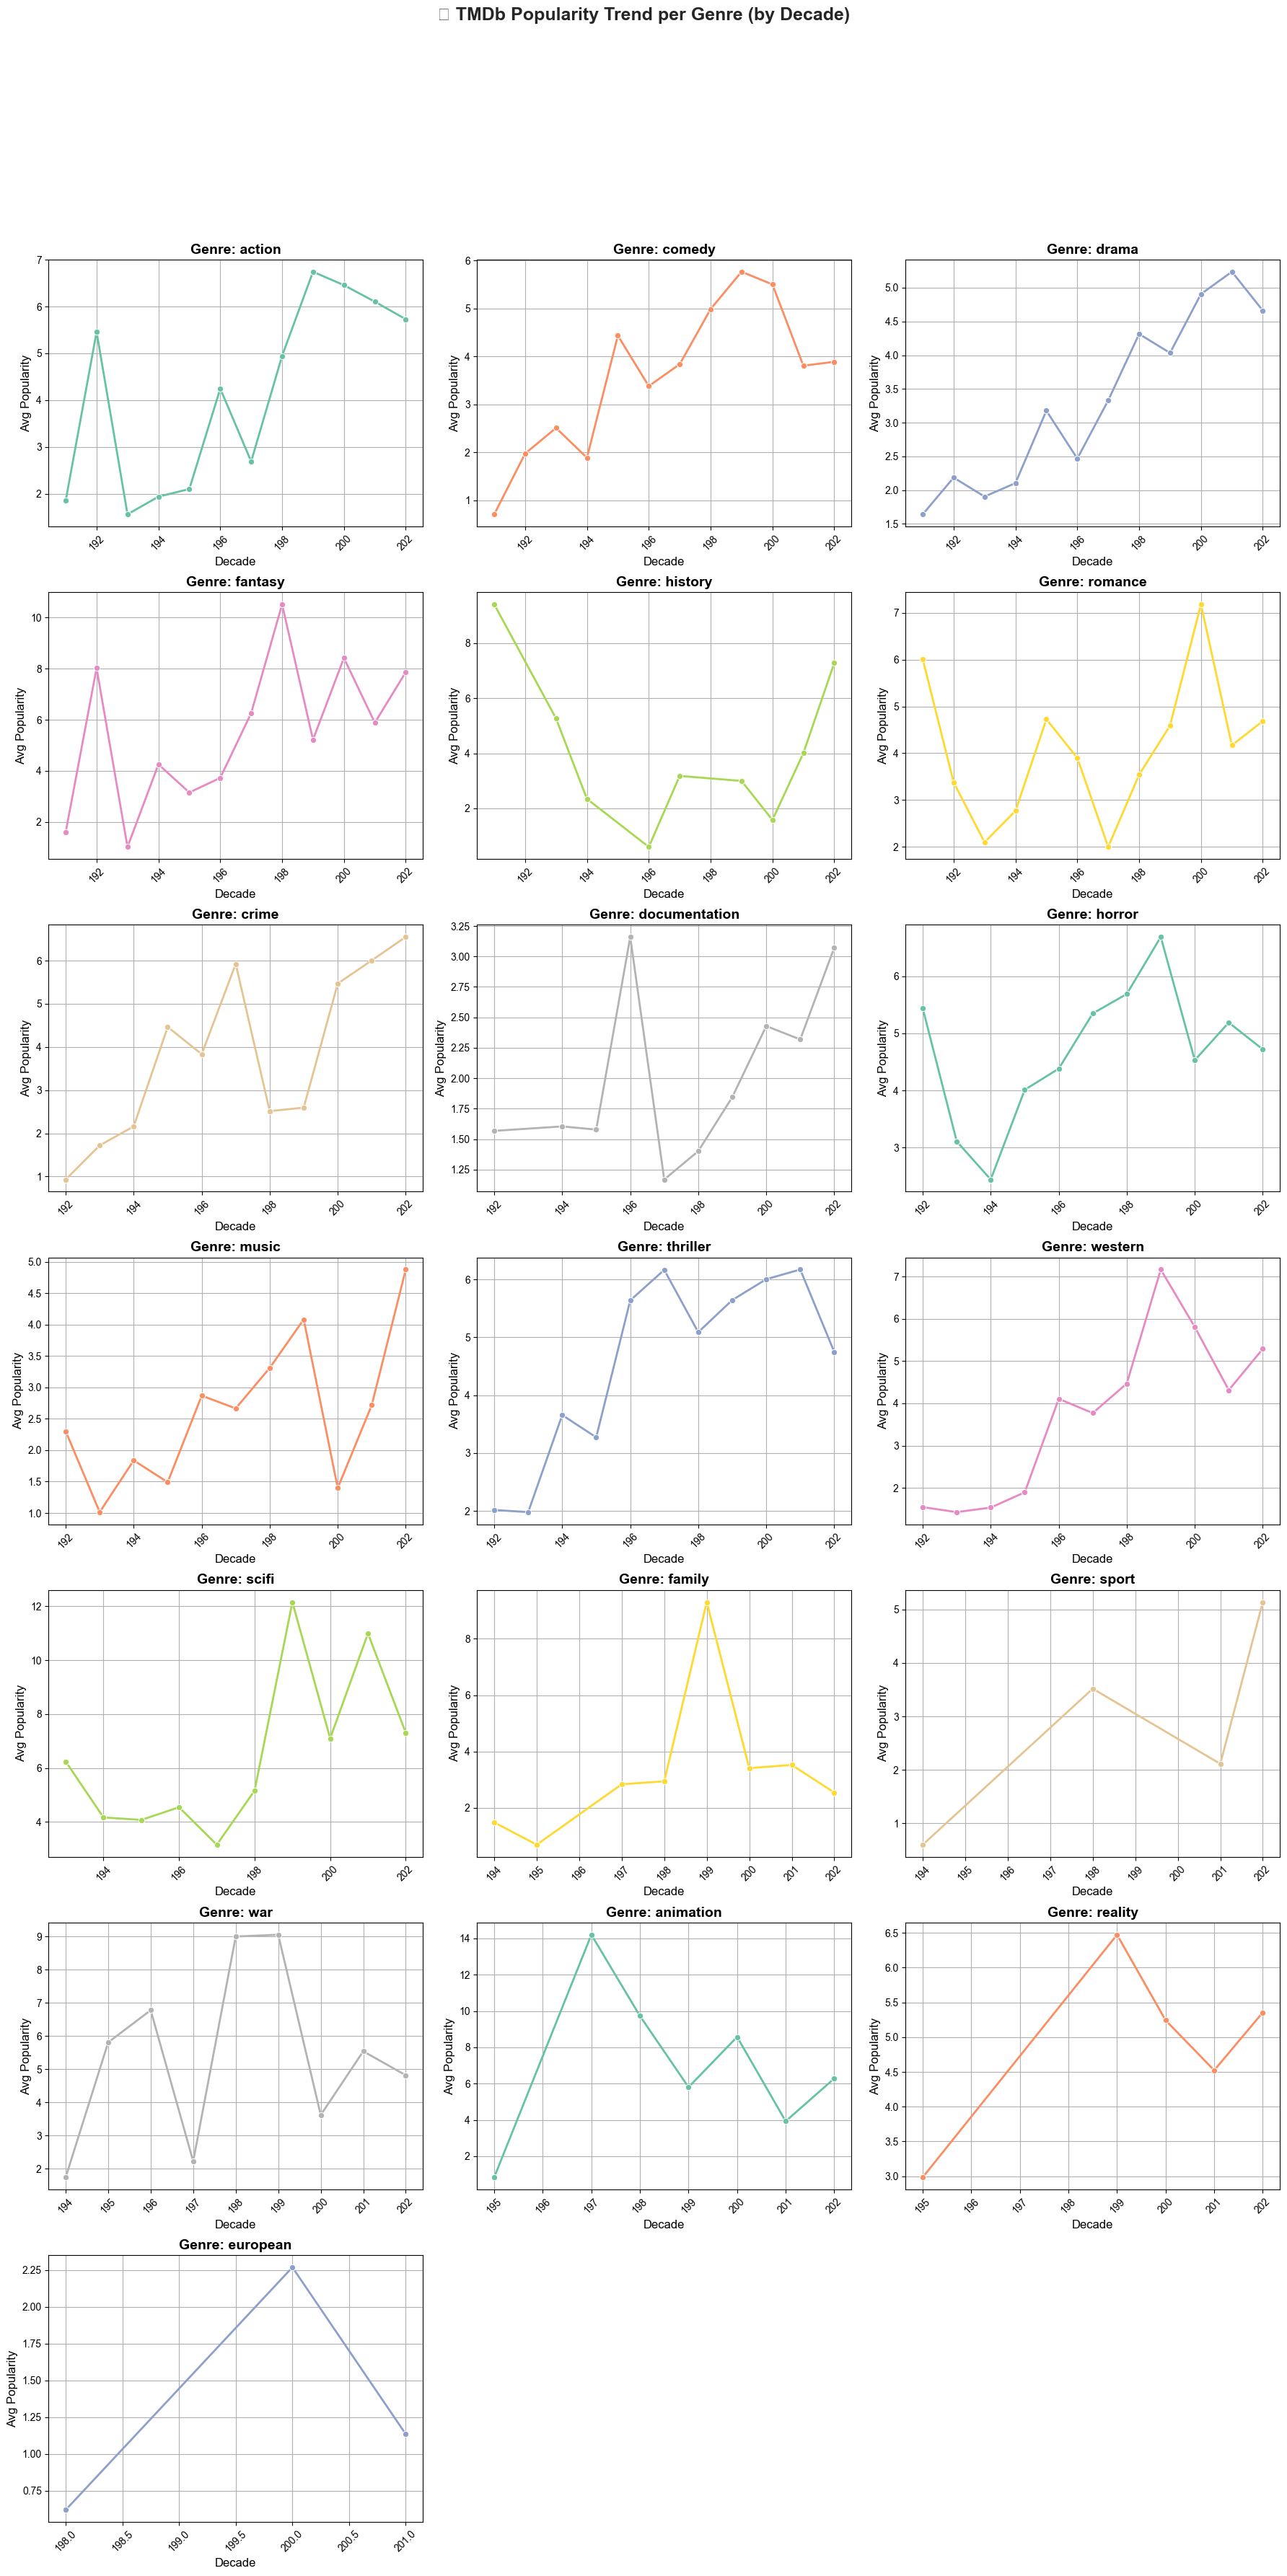

In [77]:
# Chart - 8 visualization code



unique_genres = trend_df['genres'].unique()
n = len(unique_genres)

cols = 3
rows = (n + cols - 1) // cols  # Ceiling division

# Define figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows), sharex=False, sharey=False)
axes = axes.flatten()

# Define a nice color palette
palette = sns.color_palette("Set2", n_colors=n)

# Set global style
sns.set(style="whitegrid")

for i, genre in enumerate(unique_genres):
    genre_data = trend_df[trend_df['genres'] == genre]
    sns.lineplot(
        data=genre_data,
        x='decade',
        y='tmdb_popularity',
        ax=axes[i],
        color=palette[i % len(palette)],
        marker='o',
        linewidth=2
    )
    axes[i].set_title(f'Genre: {genre}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Decade', fontsize=12)
    axes[i].set_ylabel('Avg Popularity', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('📈 TMDb Popularity Trend per Genre (by Decade)', fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for suptitle space
plt.show()


##### 1. Why did you pick the specific chart?

line chart are best to comparethe trends spicially when trend has to  be analysed across the time.

##### 2. What is/are the insight(s) found from the chart?

action, comedy, drama, triller , crime in genral has growing popularity.

anime has decresing trend.

horror movies shows a dip in popularity in last two deacade.

scifi has high popularity in last two decade.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

yes this inshights shows which content are liked by customes and is worth to invest money on.


#### Chart - 9

<Axes: xlabel='type', ylabel='tmdb_popularity_normalized'>

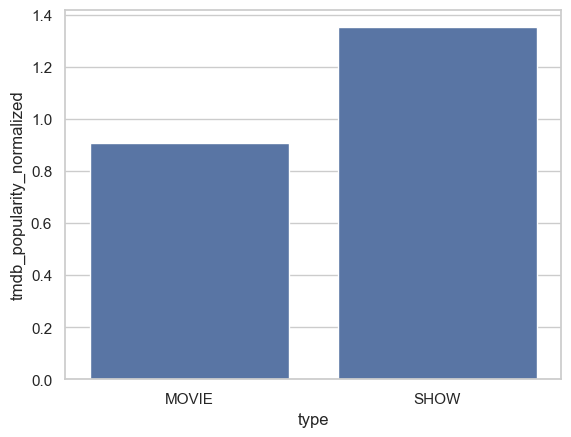

In [78]:
# Chart - 9 visualization col
# shows and movies popularity
sns.barplot( x = 'type' , y= 'tmdb_popularity_normalized' , data  =  titles_df.drop_duplicates(subset='id').groupby('type')['tmdb_popularity_normalized'].mean().reset_index())

In [79]:
titles_df.drop_duplicates(subset='id').groupby('type')['tmdb_popularity_normalized'].mean().reset_index()

,type,tmdb_popularity_normalized
0,MOVIE,0.908746
1,SHOW,1.351607


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

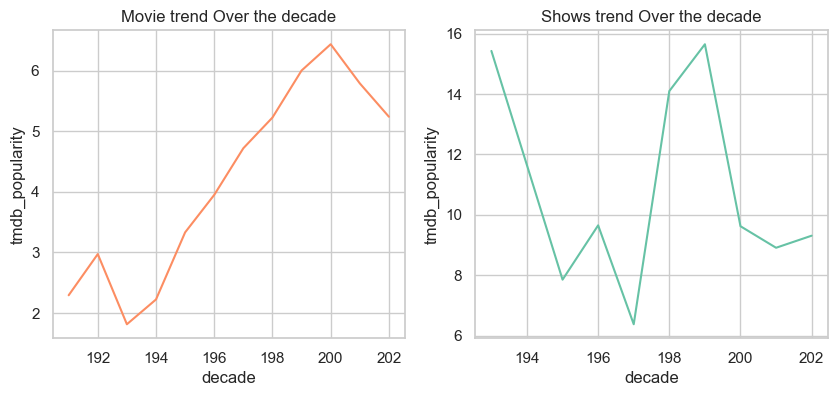

In [80]:
# Chart - 10 visualization code

# trend across decades of shows vs movies and popupularity
trend_shows_movies_popularity
fig , axs =  plt.subplots(1,2 , figsize = (10, 4))
palette = sns.color_palette("Set2", n_colors=2)
sns.lineplot(data  =  trend_shows_movies_popularity[trend_shows_movies_popularity['type'] =='MOVIE'] , x = 'decade' , y= 'tmdb_popularity' , ax=  axs[0] , color = palette[1])
axs[0].set_title('Movie trend Over the decade')
sns.lineplot(data  =  trend_shows_movies_popularity[trend_shows_movies_popularity['type'] =='SHOW'] , x = 'decade' , y= 'tmdb_popularity' , ax=  axs[1] , color = palette[0])
axs[1].set_title('Shows trend Over the decade')
plt.show()

##### 1. Why did you pick the specific chart?

line chart is best suited for time line analysis and more ever here i have seprated the movie and shows which clearly represent the trend.

##### 2. What is/are the insight(s) found from the chart?

for movies there is linear growth in popularity from 1930s then there is dip 2000 to 2020s.

shows in genreal have more popularity comapre to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 11

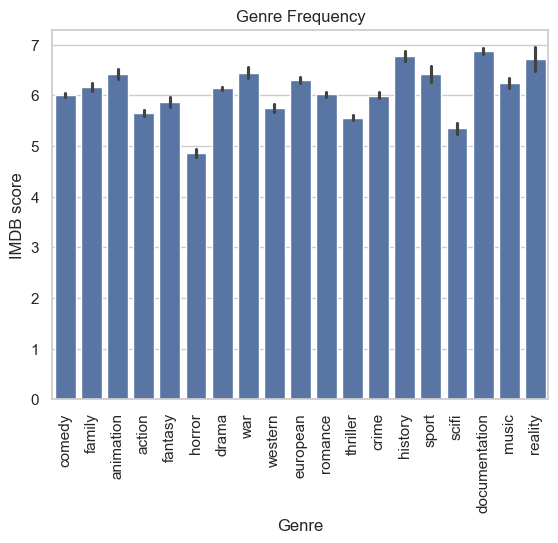

In [81]:
# Chart - 11 visualization code
sns.barplot(x = 'genres', y =  'imdb_score'  , data  = titles_df  )
plt.xticks(rotation=90)
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('IMDB score')
plt.show()

##### 1. Why did you pick the specific chart?

it repesent the mean imdb score of each genre, this repesent the liking of each genre.

##### 2. What is/are the insight(s) found from the chart?

there is no significant variations in the imdb score with respect to  genre.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there can be incresed in the good horror content.

#### Chart - 12

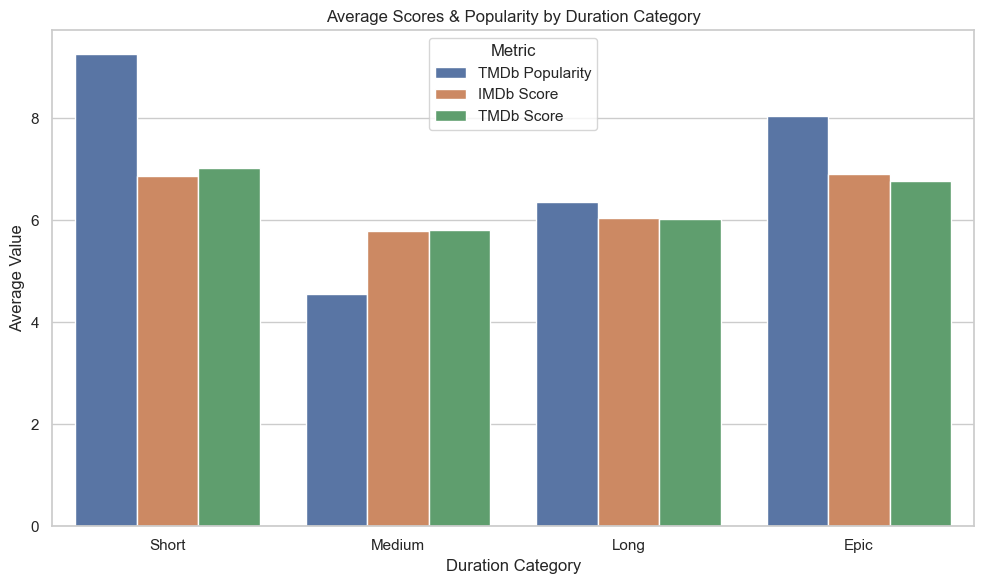

In [82]:
# Chart - 12 visualization code
melted = duration_trend.melt(id_vars="duration_category",
                             value_vars=["tmdb_popularity_mean", "imdb_score_mean", "tmdb_score_mean"],
                             var_name="Metric",
                             value_name="Value")

# Replace column names for better display
melted['Metric'] = melted['Metric'].replace({
    'tmdb_popularity_mean': 'TMDb Popularity',
    'imdb_score_mean': 'IMDb Score',
    'tmdb_score_mean': 'TMDb Score'
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='duration_category', y='Value', hue='Metric')

# Labels and title
plt.title('Average Scores & Popularity by Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

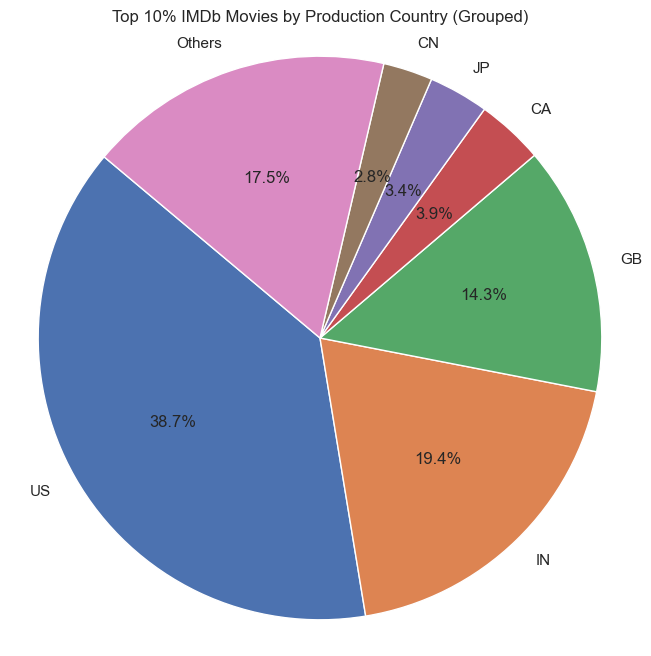

In [83]:
# Chart - 13 visualization code
country_counts = top_movies['production_countries'].value_counts().reset_index()
country_counts.columns = ['production_countries', 'count']

# Step 3: Group top 6 and rest as "Others"
top_6 = country_counts[:6]
others = country_counts[6:]
others_sum = others['count'].sum()

# Append "Others" to the top 6
final_counts = top_6.copy()
final_counts.loc[len(top_6)] = ['Others', others_sum]

# Step 4: Plot
plt.figure(figsize=(8, 8))
plt.pie(final_counts['count'], labels=final_counts['production_countries'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10% IMDb Movies by Production Country (Grouped)')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [84]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [85]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



*   increse the content in documentation  and reality genra people like it but the number of content uploaded are less.
*   there is drop in content upload from last deaced hence need to increse the content upload.

*   there are many contries which doesnt have consistent content upload promt them to upload the content.

*   increase the number of shows upload as shows genrally tends to show more popularity which  will increse the ingagement in the platform.

* promte the marketing of the movies with high  imdb score more than 80 percentile  and low popularity less than 25 percentile.

* prome the hypeof most popular movies with less imdb score so that trending videos are reached and watched maximum audinces.

* there are few contry with high popularity but imdb score is less which is result of reginal movies like KR.

* region based shows and movies should be promoted as movie may not have high popularity due to  less global promotion or less production but liked by locals.
* history , documentation , war , anime are have very high imdb score and should be permoted globaly.

* Give loyalty award for consitence content maker and provide award to for inconsitent producer for producing new content to promote content creation.


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***